In [51]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
df=pd.read_csv("C:\Git_repos\ML\cluster.csv")

In [5]:
df.head()

,Date,Client Name,DUNS,Brand,Revenue,GP,Industry,Employees
0,1/1/2022,WALPOLE OUTDOORS LLC,1006337,Manpower,5720.36,1632.50,Financials & Real Estate,350
1,1/1/2022,Lubrizol Corporation,1024314,Experis,246999.24,55198.39,Financials & Real Estate,391500
2,1/1/2022,TIMET,1024314,Experis,819.00,124.31,Financials & Real Estate,391500
3,1/1/2022,Lubrizol Corporation,1024314,JW,14400.00,10685.16,Financials & Real Estate,391500
4,1/1/2022,Lubrizol Corporation,1024314,Manpower,262607.26,47209.15,Financials & Real Estate,4698000


In [7]:
df_encoded = pd.get_dummies(df, columns=['Industry'])

In [9]:
df_encoded.head()

,Date,Client Name,DUNS,Brand,Revenue,GP,Employees,Industry_Automotive,Industry_Communication Services,Industry_Consumer Goods & Services,Industry_Financials & Real Estate,Industry_Healthcare & Life Sciences,Industry_Industrials,Industry_Information Technology,Industry_Materials,Industry_Public Sector,Industry_Transport & Logistics,Industry_Utilities
0,1/1/2022,WALPOLE OUTDOORS LLC,1006337,Manpower,5720.36,1632.50,350,False,False,False,True,False,False,False,False,False,False,False
1,1/1/2022,Lubrizol Corporation,1024314,Experis,246999.24,55198.39,391500,False,False,False,True,False,False,False,False,False,False,False
2,1/1/2022,TIMET,1024314,Experis,819.00,124.31,391500,False,False,False,True,False,False,False,False,False,False,False
3,1/1/2022,Lubrizol Corporation,1024314,JW,14400.00,10685.16,391500,False,False,False,True,False,False,False,False,False,False,False
4,1/1/2022,Lubrizol Corporation,1024314,Manpower,262607.26,47209.15,4698000,False,False,False,True,False,False,False,False,False,False,False


In [13]:
features = ['Revenue', 'GP', 'Employees'] + [col for col in df_encoded.columns if col.startswith('Industry_')]
X = df_encoded[features]

In [15]:
X.head()

,Revenue,GP,Employees,Industry_Automotive,Industry_Communication Services,Industry_Consumer Goods & Services,Industry_Financials & Real Estate,Industry_Healthcare & Life Sciences,Industry_Industrials,Industry_Information Technology,Industry_Materials,Industry_Public Sector,Industry_Transport & Logistics,Industry_Utilities
0,5720.36,1632.50,350,False,False,False,True,False,False,False,False,False,False,False
1,246999.24,55198.39,391500,False,False,False,True,False,False,False,False,False,False,False
2,819.00,124.31,391500,False,False,False,True,False,False,False,False,False,False,False
3,14400.00,10685.16,391500,False,False,False,True,False,False,False,False,False,False,False
4,262607.26,47209.15,4698000,False,False,False,True,False,False,False,False,False,False,False


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Step 6: Elbow Method to Choose Number of Clusters
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

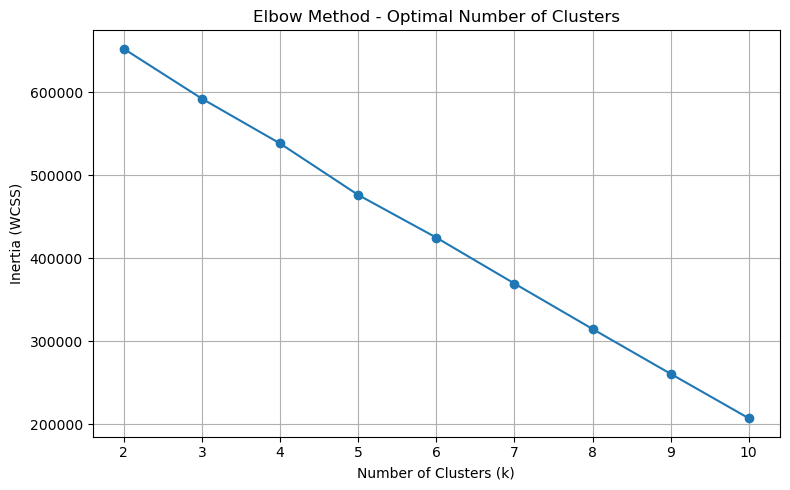

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method - Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)


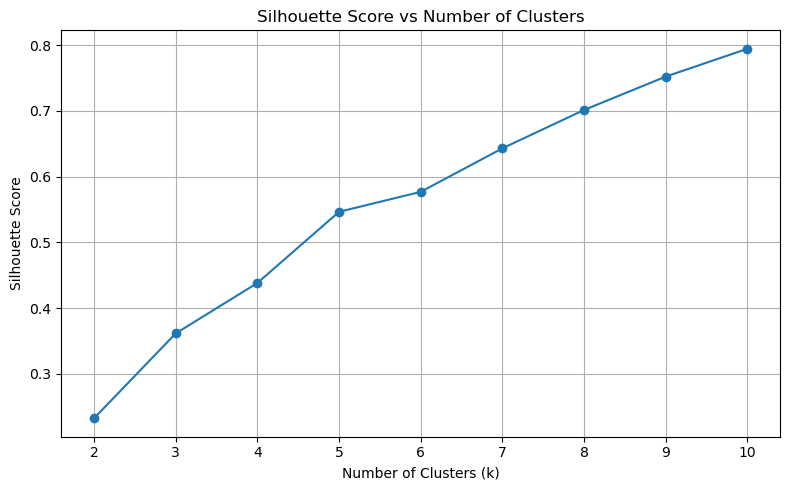

In [27]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
#Apply KMeans with Best k from Silhouette Score
best_index = silhouette_scores.index(max(silhouette_scores))
best_k = list(k_range)[best_index]
print(f"Best number of clusters based on silhouette score: {best_k}")

Best number of clusters based on silhouette score: 10


In [31]:
#  Apply KMeans with Chosen k 
kmeans = KMeans(n_clusters=5, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(X_scaled)


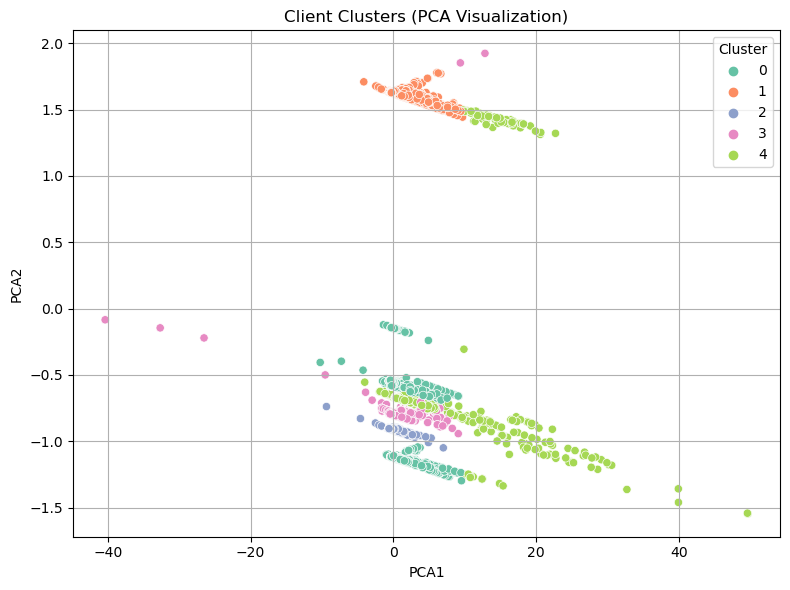

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_encoded['PCA1'] = X_pca[:, 0]
df_encoded['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Client Clusters (PCA Visualization)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# Step 8: Analyze Cluster Profiles
cluster_summary = df_encoded.groupby('Cluster')[['Revenue', 'GP', 'Employees']].mean().round(2)
print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
            Revenue        GP  Employees
Cluster                                
0         77714.18  20520.35   43832.63
1         72565.43  17825.49   56432.73
2         43180.49  10273.68   27448.65
3         51603.11   7950.46  116724.03
4        349435.72  92316.10   94417.11


In [39]:
# Client Summary

print(" * Low Revenue, Low Profit Clients → Cluster 0,1")
print(" * Small clients → Cluster 2")
print(" * High employee count, low profit → Cluster 3")
print(" * High value clientss → Cluster 4")


 * Low Revenue, Low Profit Clients → Cluster 0,1
 * Small clients → Cluster 2
 * High employee count, low profit → Cluster 3
 * High value clientss → Cluster 4
